# Cuaderno para realizar la exploracion en la busqueda de estaciones vecinas
Para realizar este proceso comenzamos utilizando el catalogo de estaciones que proporciona el IDEAM a traves del DHIME, para de esta forma obtener coordenadas geograficas, nivel de altura y zonas hidrograficas de todas las estaciones del pais.

In [3]:
!pip install xlrd

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/96.5 kB ? eta -:--:--
   ---------------------------------------- 96.5/96.5 kB 1.8 MB/s eta 0:00:00


In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Leemos  el archivo XLSX
catalogue = pd.read_excel("../RecursosYDocumentos/DatosEstaciones/CNE_IDEAM.xls")

print(catalogue.columns)
# listamos el lsitado de zonas hidrográficas
catalogue['ZONA_HIDROGRAFICA'].unique()


Index(['CODIGO', 'NOMBRE', 'CATEGORIA', 'TECNOLOGIA', 'ESTADO',
       'FECHA_INSTALACION', 'FECHA_SUSPENSION', 'ALTITUD', 'LATITUD',
       'LONGITUD', 'DEPARTAMENTO', 'MUNICIPIO', 'AREA_OPERATIVA', 'ENTIDAD',
       'AREA_HIDROGRAFICA', 'ZONA_HIDROGRAFICA', 'SUBZONA_HIDROGRAFICA',
       'CORRIENTE', 'OBSERVACION', 'SUBRED', 'CODIGO REAL'],
      dtype='object')


array(['Patía', 'Cauca', 'Nechí', 'Alto Magdalena', 'Caribe - Litoral',
       'Sogamoso', 'Meta', 'Caquetá', 'Medio Magdalena', 'Cesar', 'Sinú',
       'Catatumbo', 'Inírida', 'Atrato - Darién', 'Caribe - Guajira',
       'Bajo Magdalena', 'Arauca', 'Bajo Magdalena- Cauca -San Jorge',
       'Guaviare', 'Caguán', 'Pacífico - Directos', 'San Juán',
       'Putumayo', 'Saldaña', 'Casanare', 'Tomo', 'Orinoco Directos',
       'Tapaje - Dagua - Directos', 'Islas Caribe', 'Amazonas - Directos',
       'Vaupes', 'Vichada', 'Baudó - Directos Pacifico', 'Yarí', 'Mira',
       'Apaporis'], dtype=object)

In [2]:
# Filtramos por la zona hidrográfica 'Magdalena Medio'
catalogue = catalogue[catalogue['ZONA_HIDROGRAFICA'] == 'Medio Magdalena']
catalogue.count()

CODIGO                  421
NOMBRE                  421
CATEGORIA               421
TECNOLOGIA              421
ESTADO                  421
FECHA_INSTALACION       421
FECHA_SUSPENSION        197
ALTITUD                 421
LATITUD                 421
LONGITUD                421
DEPARTAMENTO            421
MUNICIPIO               421
AREA_OPERATIVA          421
ENTIDAD                 421
AREA_HIDROGRAFICA       421
ZONA_HIDROGRAFICA       421
SUBZONA_HIDROGRAFICA    421
CORRIENTE               154
OBSERVACION             124
SUBRED                  117
CODIGO REAL              16
dtype: int64

In [3]:
# Revisamos los tipos de estaciones
catalogue['CATEGORIA'].unique()

array(['Agrometeorológica', 'Sinóptica Principal', 'Climática Ordinaria',
       'Pluviográfica', 'Pluviométrica', 'Meteorológica Especial',
       'Climática Principal', 'Limnigráfica', 'Limnimétrica',
       'Radio Sonda', 'Sinóptica Secundaria'], dtype=object)

In [4]:
# Filtramos por que el tipo de estación no este entre 'Limnigráfica', 'Limnimétrica', 'Radio Sonda' y 'Metereológica Marina' puesto a que no tienen valores de precipitación
catalogue = catalogue[~catalogue['CATEGORIA'].isin(['Limnigráfica', 'Limnimétrica', 'Radio Sonda', 'Metereológica Marina'])]
catalogue.count()

CODIGO                  269
NOMBRE                  269
CATEGORIA               269
TECNOLOGIA              269
ESTADO                  269
FECHA_INSTALACION       269
FECHA_SUSPENSION        103
ALTITUD                 269
LATITUD                 269
LONGITUD                269
DEPARTAMENTO            269
MUNICIPIO               269
AREA_OPERATIVA          269
ENTIDAD                 269
AREA_HIDROGRAFICA       269
ZONA_HIDROGRAFICA       269
SUBZONA_HIDROGRAFICA    269
CORRIENTE                 3
OBSERVACION              73
SUBRED                   87
CODIGO REAL               3
dtype: int64

In [5]:
# Obtenemos los valores para los que existe el valor en la columna 'CODIGO REAL', reemplazamos todas las cadenas por NaN y casteamos a entero
catalogue_depured = catalogue.copy()
catalogue_depured['CODIGO REAL'] = pd.to_numeric(catalogue_depured['CODIGO REAL'], errors='coerce')

catalogue_depured = catalogue_depured.astype({'CODIGO REAL': 'Int64'})

catalogue_depured['CODIGO'] = catalogue_depured['CODIGO REAL'].fillna(catalogue_depured['CODIGO'])
catalogue_depured = catalogue.drop(columns=['CODIGO REAL', 'FECHA_INSTALACION', 'FECHA_SUSPENSION', 'AREA_OPERATIVA', 'OBSERVACION', 'SUBRED', 'CORRIENTE', 'ENTIDAD', 'ESTADO'])
catalogue_depured.head()

,CODIGO,NOMBRE,CATEGORIA,TECNOLOGIA,ALTITUD,LATITUD,LONGITUD,DEPARTAMENTO,MUNICIPIO,AREA_HIDROGRAFICA,ZONA_HIDROGRAFICA,SUBZONA_HIDROGRAFICA
15,23195240,AGUACHICA - AUT [23195240],Agrometeorológica,Automática con Telemetría,103,8.123417,-73.579861,Cesar,Aguachica,Magdalena Cauca,Medio Magdalena,Quebrada El Carmen y Otros Directos al Magdalena
28,24055070,SAN VICENTE DE CHUCURI - AUT [24055070],Agrometeorológica,Automática con Telemetría,1093,6.823390,-73.472060,Santander,San Vicente De Chucurí,Magdalena Cauca,Medio Magdalena,Río Opón
35,23085200,AEROPUERTO J M CORDOVA [23085200],Sinóptica Principal,Automática sin Telemetría,2073,6.168611,-75.425833,Antioquia,Rionegro,Magdalena Cauca,Medio Magdalena,Río Nare
36,23175020,AEROPUERTO OTU [23175020],Climática Ordinaria,Convencional,643,7.011750,-74.716306,Antioquia,Remedios,Magdalena Cauca,Medio Magdalena,Río Cimitarra y otros directos al Magdalena
52,23080950,VIENTO EL [23080950],Pluviográfica,Convencional,890,6.400000,-75.100000,Antioquia,Alejandría,Magdalena Cauca,Medio Magdalena,Río Nare


Una vez que estamos en este punto, procedemos a aplicar los distintos filtros que nos permitiran saber que estaciones son vecinas de que otras. Procedemos a realizar una propuesta sobre como tomar los rangos de altura y precipitación. Primero empezamos con el rango de altura, para el cual utilizamos los rangos definidos por Bernal et al. 2010.

**Tabla 1. Rangos de Elevación y Precipitación Media Anual Multianual**

| RANGO | ELEVACIÓN (msnm) | PRECIPITACIÓN MEDIA ANUAL MULTIANUAL (mm) |
|-------|------------------|-------------------------------------------|
| 1     | ≤300             | ≤500                                      |
| 2     | 301-600          | 501.1-1,000                               |
| 3     | 601-900          | 1,001.1-1,500                             |
| 4     | 901-1,200        | 1,501.1-2,000                             |
| 5     | 1,201-1,500      | 2,001.1-2,500                             |
| 6     | 1,501-1,800      | 2,501.1-3,000                             |
| 7     | 1,801-2,100      | 3,001.1-3,500                             |
| 8     | 2,101-2,400      | 3,501.1-4,000                             |
| 9     | 2,401-2,700      | 4,001.1-4,500                             |
| 10    | ≥2,700           | ≥5,000                                    |

Fuente: Bernal et al., 2010

In [6]:
rangos_elevacion = [
    (float('-inf'), 300, 1),
    (301, 600, 2),
    (601, 900, 3),
    (901, 1200, 4),
    (1201, 1500, 5),
    (1501, 1800, 6),
    (1801, 2100, 7),
    (2101, 2400, 8),
    (2401, 2700, 9),
    (2701, float('inf'), 10)
]

def asignar_rango_elevacion(elevacion):
    for min_elev, max_elev, rango in rangos_elevacion:
        if min_elev <= elevacion <= max_elev:
            return rango
    return None

catalogue_depured['RANGO_ALTITUD'] = catalogue_depured['ALTITUD'].apply(asignar_rango_elevacion)

Obtenemos el promedio multianual de todas las estaciones de la zona hidrografica

In [7]:
import os

path = '../datos/imputados_SARIMA/'
zonas_hidrograficas = ['MAGDALENA_MEDIO']

precipitaciones = [
    (0, 500, 1),
    (501, 1000, 2),
    (1001, 1500, 3),
    (1501, 2000, 4),
    (2001, 2500, 5),
    (2501, 3000, 6),
    (3001, 3500, 7),
    (3501, 4000, 8),
    (4001, 4500, 9),
    (4501, float('inf'), 10)

]

def asignar_rango_precipitacion(precipitacion):
    for min_prec, max_prec, rango in precipitaciones:
        if min_prec <= precipitacion <= max_prec:
            return rango
    return None

multi_anual_means = []

for zona_hidrografica in zonas_hidrograficas:
    file_path = f'{path}{zona_hidrografica}/'

    for file in os.listdir(file_path):
        code = file.split('.')[0]
        estacion = pd.read_csv(f'{file_path}/{file}')
        estacion = estacion.groupby('Año').agg({'Precipitación_imputada': 'sum'}).reset_index()
        estacion['Promedio_anual'] = estacion['Precipitación_imputada']

        promedio_multianual = estacion['Promedio_anual'].mean()

        multi_anual_means.append({
            'Codigo': code,
            'Promedio_multianual': promedio_multianual
        })
    multi_anual_means_df = pd.DataFrame(multi_anual_means)
    multi_anual_means_df['RANGO_PRECIPITACION'] = multi_anual_means_df['Promedio_multianual'].apply(asignar_rango_precipitacion)
    multi_anual_means_df.to_csv(f'../datos/promedio_multianual_{zona_hidrografica}.csv', index=False)

In [8]:
multi_anual_means_df = multi_anual_means_df.astype({'Codigo': 'int32'})
catalogue_total = catalogue_depured.astype({'CODIGO': 'int32'})
catalogue_total = multi_anual_means_df.merge(catalogue_total, left_on='Codigo', right_on='CODIGO', how='left')

catalogue_total

,Codigo,Promedio_multianual,RANGO_PRECIPITACION,CODIGO,NOMBRE,CATEGORIA,TECNOLOGIA,ALTITUD,LATITUD,LONGITUD,DEPARTAMENTO,MUNICIPIO,AREA_HIDROGRAFICA,ZONA_HIDROGRAFICA,SUBZONA_HIDROGRAFICA,RANGO_ALTITUD
0,23010020,2692.298672,6,23010020,EDEN EL [23010020],Pluviométrica,Convencional,1670,5.154299,-75.047878,Tolima,Fresno,Magdalena Cauca,Medio Magdalena,Río Gualí,6
1,23010080,1180.953042,3,23010080,IDEMA-HONDA [23010080],Pluviométrica,Convencional,2508,5.201417,-74.749583,Tolima,Honda,Magdalena Cauca,Medio Magdalena,Río Gualí,9
2,23020080,3288.067937,7,23020080,MANZANARES [23020080],Pluviométrica,Convencional,1974,5.265611,-75.144083,Caldas,Manzanares,Magdalena Cauca,Medio Magdalena,Río Guarinó,7
3,23020090,1885.285317,4,23020090,MARULANDA [23020090],Pluviométrica,Convencional,2813,5.278100,-75.267200,Caldas,Marulanda,Magdalena Cauca,Medio Magdalena,Río Guarinó,10
4,23020100,3795.546764,8,23020100,VICTORIA LA [23020100],Pluviométrica,Convencional,760,5.321083,-74.914639,Caldas,Victoria,Magdalena Cauca,Medio Magdalena,Río Guarinó,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,23210160,1339.385479,3,23210160,GAMARRA [23210160],Pluviométrica,Convencional,150,8.326667,-73.737778,Cesar,Gamarra,Magdalena Cauca,Medio Magdalena,Quebrada El Carmen y Otros Directos al Magdalena,1
129,23215030,1297.252029,3,23215030,AGUAS CLARAS [23215030],Pluviométrica,Convencional,208,8.228889,-73.602778,Cesar,Aguachica,Magdalena Cauca,Medio Magdalena,Quebrada El Carmen y Otros Directos al Magdalena,1
130,23215050,3077.923459,7,23215050,MATA LA [23215050],Pluviométrica,Convencional,163,8.614444,-73.636389,Cesar,La Gloria,Magdalena Cauca,Medio Magdalena,Quebrada El Carmen y Otros Directos al Magdalena,1
131,25020970,1692.052335,4,25020970,ARENAL [25020970],Pluviométrica,Convencional,74,8.459444,-73.941111,Bolivar,Arenal,Magdalena Cauca,Medio Magdalena,Directos al Magdalena (Brazo Morales),1


Generamos ahora la tabla de matriz de ponderaciones espaciales para la zona hidrografica.

In [137]:
! pip install scipy
! pip install pysal

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/5.7 MB ? eta -:--:--
     -- ------------------------------------- 0.4/5.7 MB 12.9 MB/s eta 0:00:01
     ------ --------------------------------- 0.9/5.7 MB 11.2 MB/s eta 0:00:01
     ---------- ----------------------------- 1.5/5.7 MB 11.8 MB/s eta 0:00:01
     -------------- ------------------------- 2.1/5.7 MB 12.2 MB/s eta 0:00:01
     ------------------ --------------------- 2.7/5.7 MB 12.3 MB/s eta 0:00:01
     --------------------- ------------------ 3.1/5.7 MB 12.5 MB/s eta 0:00:01
     ------------------------- -------------- 3.6/5.7 MB 11.5 MB/s eta 0:00:01
     ----------------------------- ---------- 4.2/5.7 MB 11.6 MB/s eta 0:00:01
     ------------------------------- -------- 4.5/5.7 MB 11.1 MB/s eta 0:00:01
     ------------------------------------ --- 5.2/5.7 MB 11.4 MB/s eta 0:00:01
     --------------------------------

In [9]:
from scipy.spatial import distance_matrix
import numpy as np

coords = catalogue_total[['LATITUD', 'LONGITUD']].values
dist_matrix = distance_matrix(coords, coords)

# Crear la matriz de pesos espaciales inversa de la distancia
# Evitar dividir por cero en la diagonal
np.fill_diagonal(dist_matrix, np.nan)
weights = 1 / dist_matrix
np.fill_diagonal(weights, 0)

In [10]:
mean_precip = catalogue_total['Promedio_multianual'].mean()

# Calcular el numerador del índice de Moran
numerator = 0
for i in range(len(catalogue_total)):
    for j in range(len(catalogue_total)):
        numerator += weights[i, j] * (catalogue_total['Promedio_multianual'][i] - mean_precip) * (catalogue_total['Promedio_multianual'][j] - mean_precip)

# Calcular el denominador del índice de Moran
denominator = np.sum(weights) * np.sum((catalogue_total['Promedio_multianual'] - mean_precip)**2)

In [11]:
# Calcular el índice de Moran
I = len(catalogue_total) * numerator / denominator

print(f"Índice de Moran I: {I}")

Índice de Moran I: 0.44354267299240097


Procedemos ahora a realizar una implementacion que busque el indice de Moran teniendo en cuenta diferentes rangos de distancias, para ver cual es la distancia maxima en que dos pares de estaciones cumplan la condicion donde el radio de acción de correlación espacial de precipitación sea significativo. Primero obtenemos el listado de las distancias entre todos los pares de estaciones.

In [12]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

df = catalogue_total.copy()

coords = df[['LATITUD', 'LONGITUD']].values
dist_matrix = distance_matrix(coords, coords)

moran_indices = []

# Función para calcular la distancia geodésica (Haversine) entre dos puntos
def haversine(lat1, lon1, lat2, lon2):
    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # Fórmula de Haversine
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    # Radio de la Tierra en km
    r = 6371
    return c * r

# Calcular la distancia máxima entre cada par de estaciones
distances = []
par_estaciones = []

for i in range(len(df)):
    for j in range(i + 1, len(df)):
        dist = haversine(df['LATITUD'][i], df['LONGITUD'][i], df['LATITUD'][j], df['LONGITUD'][j])
        distances.append(dist)
        par_estaciones.append((df['CODIGO'][i], df['CODIGO'][j]))

# Crear un DataFrame con las distancias y las precipitaciones de cada par de estaciones
dist_df = pd.DataFrame({
    'Estación 1': [p[0] for p in par_estaciones],
    'Estación 2': [p[1] for p in par_estaciones],
    'Distancia': distances
})

dist_df

,Estación 1,Estación 2,Distancia
0,23010020,23010080,33.446382
1,23010020,23020080,16.330745
2,23010020,23020090,27.916648
3,23010020,23020100,23.698271
4,23010020,23025040,22.008116
...,...,...,...
8773,23215030,25020970,45.196938
8774,23215030,26155150,414.056948
8775,23215050,25020970,37.680867
8776,23215050,26155150,450.821893


Con este listado, se generan 20 rangos donde cada rango de distancias incluya una proporción igual o similar de pares de estaciones

In [13]:
# Definimos 20 rangos de posibles de distancias, donde cada rango tenga la misma cantidad de pares de estaciones
num_ranges = 20

dist_df = dist_df.sort_values('Distancia').reset_index(drop=True)

dist_df['Rango'] = pd.qcut(dist_df.index, num_ranges, labels=False)

rangos = dist_df.groupby('Rango')['Distancia'].agg(['min', 'max', 'count'])
rangos = rangos.reset_index()

print(rangos)

    Rango         min         max  count
0       0    0.028975   30.117696    439
1       1   30.160949   48.838450    439
2       2   48.850780   63.072326    439
3       3   63.080778   75.787031    439
4       4   75.833287   87.595643    439
5       5   87.600497  100.406643    439
6       6  100.429582  113.435618    438
7       7  113.521824  126.513105    439
8       8  126.539764  139.634921    439
9       9  139.706854  153.934162    439
10     10  153.940496  169.497442    439
11     11  169.549067  185.895851    439
12     12  185.905061  204.047315    439
13     13  204.074984  223.528893    438
14     14  223.596389  239.467117    439
15     15  239.472784  256.731468    439
16     16  256.733087  274.801324    439
17     17  274.959509  293.953167    439
18     18  294.074307  324.290750    439
19     19  324.392431  450.821893    439


Encontramos ahora la matriz de distancias para poder obtener facilmente el indice de Moran, para ello volvemos a utilizar el metodo de Harvesine para obtener la distancia en kilometros.

In [14]:
import numpy as np
import pandas as pd

df = catalogue_total.copy()

# Función para convertir grados a radianes
def deg2rad(degrees):
    return degrees * np.pi / 180

def haversine_distance_matrix(latlon):
    # Radio de la Tierra en kilómetros
    R = 6371.0

    # Convertir latitud y longitud de grados a radianes
    lat_rad = deg2rad(latlon[:, 0])
    lon_rad = deg2rad(latlon[:, 1])

    # Crear matriz de diferencias en latitud y longitud
    lat_diff = np.subtract.outer(lat_rad, lat_rad)
    lon_diff = np.subtract.outer(lon_rad, lon_rad)

    # Aplicar la fórmula del haversine
    a = np.sin(lat_diff / 2) ** 2 + np.cos(lat_rad[:, None]) * np.cos(lat_rad) * np.sin(lon_diff / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Distancia en kilómetros
    distance_km = R * c
    return distance_km

coords = df[['LATITUD', 'LONGITUD']].values

# Calcular la matriz de distancias
dist_matrix_km = haversine_distance_matrix(coords)

dist_matrix_km.shape

(133, 133)

Realizamos la busqueda del indice de Moran para todos aquellos pares de estaciones que cumplan la condicion de tener distancias entre si, menores al rango que se esta buscando en ese momento.

In [15]:
# Inicializar lista para almacenar los índices de Moran para cada rango
moran_indices_rangos = []

# Calcular el índice de Moran para cada rango de distancia
for k in range(len(rangos)):
    # Crear máscara para seleccionar pares de estaciones dentro del rango
    mask = (dist_matrix_km >= rangos['min'][k]) & (dist_matrix_km < rangos['max'][k])

    # Crear matriz de pesos espaciales inversa de la distancia, evitando dividir por cero en la diagonal
    weights = np.zeros_like(dist_matrix_km)
    np.fill_diagonal(weights, 0)
    weights[mask] = 1 / dist_matrix_km[mask]

    # Media de la precipitación
    mean_precip = df['Promedio_multianual'].mean()

    # Calcular el numerador del índice de Moran
    numerator = 0
    for i in range(len(df)):
        for j in range(len(df)):
            numerator += weights[i, j] * (df['Promedio_multianual'][i] - mean_precip) * (df['Promedio_multianual'][j] - mean_precip)

    # Calcular el denominador del índice de Moran
    denominator = np.sum(weights) * np.sum((df['Promedio_multianual'] - mean_precip) ** 2)

    # Calcular el índice de Moran
    I = len(df) * numerator / denominator if denominator != 0 else np.nan

    moran_indices_rangos.append(I)

# Mostrar los índices de Moran para cada rango
rangos['Índice de Moran'] = moran_indices_rangos
rangos

rangos.to_csv(f'../datos/indice_moran_rangos_{zona_hidrografica}.csv', index=False)

Graficamos los puntos obtenidos para el indice de Moran.

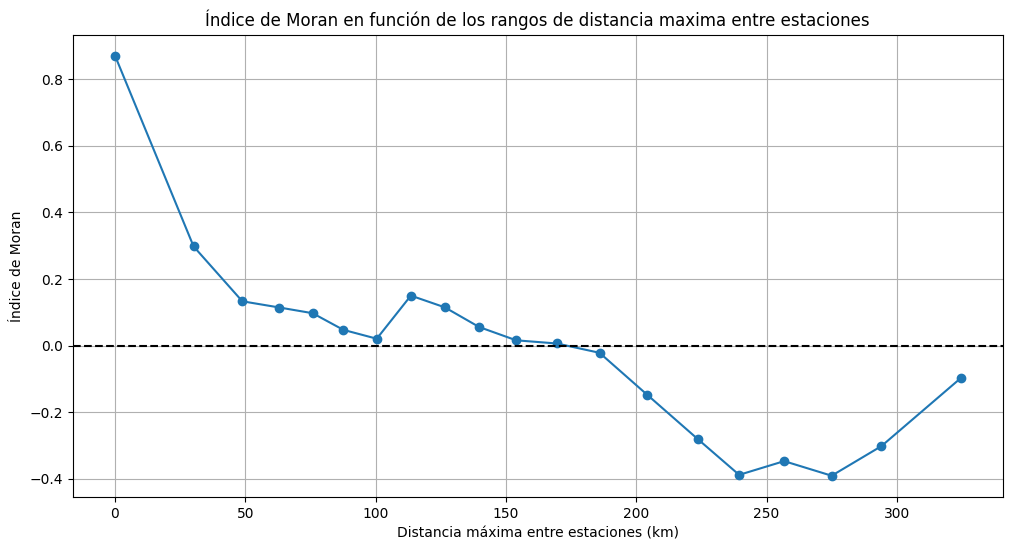

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(rangos['min'], rangos['Índice de Moran'], marker='o')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Distancia máxima entre estaciones (km)')
plt.ylabel('Índice de Moran')
plt.title('Índice de Moran en función de los rangos de distancia maxima entre estaciones')
plt.grid(True)
plt.show()

Realizamos una busqueda de todas aquellas estaciones que cumplan las 4 condiciones para encontrar sus respectivas vecinas. La primera ya la cumplen al estar analizando unicamente una zona hidrografica, partiendo de cada estacion vamos a valorar todas las que puedan ser vecinas que cumplan tener el mismo rango de altura, el mismo rango de precipitaciones y entrarse a maximo 30.117696 Km de disntacia.

In [17]:
# Realizamos una busqueda de todas aquellas estaciones que cumplan las 4 condiciones para encontrar sus respectivas vecinas. La primera ya la cumplen al estar analizando unicamente una zona hidrografica, partiendo de cada estacion vamos a valorar todas las que puedan ser vecinas que cumplan tener el mismo rango de altura, el mismo rango de precipitaciones y entrarse a maximo 30.117696 Km de disntacia.

vecinas_df = pd.DataFrame(columns=['Rango Altitud', 'Rango Precipitación', 'Estación', 'Vecinas'])

# Definimos las condiciones
# Rango de altitud
for i in range(10):
    # Rango de precipitación
    for j in range(10):
        estaciones = df[(df['RANGO_ALTITUD'] == i + 1) & (df['RANGO_PRECIPITACION'] == j + 1)]
        if len(estaciones) > 0:
            # Calcular la matriz de distancias
            coords = estaciones[['LATITUD', 'LONGITUD']].values
            dist_matrix_km = haversine_distance_matrix(coords)

            # Llenamos la diagonal con NaN
            np.fill_diagonal(dist_matrix_km, np.nan)

            # Crear lista de estaciones vecinas
            vecinas = []
            for l in range(len(estaciones)):
                # Encontrar las estaciones vecinas dentro de la distancia máxima
                vecinas_estacion = estaciones[dist_matrix_km[l] < 30.117696 ]
                vecinas.append(vecinas_estacion['CODIGO'].values)

            # Crear un DataFrame con las estaciones y sus vecinas
            
            range_veci = pd.DataFrame({
                'Rango Altitud': i + 1,
                'Rango Precipitación': j + 1,
                'Estación': estaciones['CODIGO'].values,
                'Vecinas': vecinas
            })

            vecinas_df = pd.concat([vecinas_df, range_veci], ignore_index=True)


vecinas_df.to_csv(f'../datos/estaciones_vecinas_{zona_hidrografica}.csv', index=False)

In [18]:
vecinas_df[vecinas_df['Estación'] == 23125120]

,Rango Altitud,Rango Precipitación,Estación,Vecinas
44,1,7,23125120,[]


In [19]:
df1 = dist_df[dist_df['Estación 1'] == 23125120]
df2 = dist_df[dist_df['Estación 2'] == 23125120]

df2 = df2.rename(columns={'Estación 1': 'Estación 2', 'Estación 2': 'Estación 1'})

df_union = pd.concat([df1, df2])

# filtramos buscando la estacion 23120200
df_union[df_union['Estación 2'] == 23120200]

,Estación 1,Estación 2,Distancia,Rango
407,23125120,23120200,28.891445,0


In [20]:
# buscamos las anteriores estaciones en el catalogo
catalogue_total[catalogue_total['CODIGO'].isin([23125120, 23120200])]

,Codigo,Promedio_multianual,RANGO_PRECIPITACION,CODIGO,NOMBRE,CATEGORIA,TECNOLOGIA,ALTITUD,LATITUD,LONGITUD,DEPARTAMENTO,MUNICIPIO,AREA_HIDROGRAFICA,ZONA_HIDROGRAFICA,SUBZONA_HIDROGRAFICA,RANGO_ALTITUD
58,23120200,2942.685000,6,23120200,PUERTO ARAUJO ALERTAS [23120200],Pluviométrica,Convencional,118,6.533889,-74.082500,Santander,Cimitarra,Magdalena Cauca,Medio Magdalena,Río Carare (Minero),1
69,23125120,3142.381564,7,23125120,CIMITARRA [23125120],Climática Ordinaria,Convencional,198,6.308611,-73.952222,Santander,Cimitarra,Magdalena Cauca,Medio Magdalena,Río Carare (Minero),1
